In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
testing = pd.read_csv('testing.csv')
training = pd.read_csv('training.csv')
total_data = pd.read_csv('total_data.csv')

# D-tale 

In [4]:
# import dtale

In [5]:
# d = dtale.show(total_data)
# d.open_browser()

# Graphs

In [3]:
total_data.columns.values

array(['number', 'gender', 'age', 'mean_r', 'mean_g', 'mean_b', 'mean_rg',
       'HHR', 'Ent', 'B', 'G1', 'G2', 'G3', 'G4', 'G5', 'label', 'hgb',
       'gender_actual'], dtype=object)

In [4]:
total_data.head()

,number,gender,age,mean_r,mean_g,mean_b,mean_rg,HHR,Ent,B,G1,G2,G3,G4,G5,label,hgb,gender_actual
0,1,0,29,162.253551,110.344051,140.106420,66.783275,0.051072,1125.472761,129.062154,3.390000,3.542816,-6.590000e-18,2.562056,40.268672,0,12.2,M
1,2,1,36,93.155839,57.903152,82.817630,46.735631,0.024032,564.048278,68.833649,1.175424,1.272608,1.460000e-17,0.917702,8.827232,1,8.0,F
2,3,1,30,156.337977,127.740262,153.386077,54.392947,0.017872,695.100841,139.239840,2.593296,2.793504,-8.640000e-18,2.032372,28.944064,1,10.7,F
3,4,1,39,168.003551,142.526411,171.719288,41.573798,0.007344,1248.653137,153.478341,3.447792,3.346256,6.161600e-02,2.564352,49.143024,1,8.3,F
4,5,1,29,161.395007,128.240333,153.480755,58.491050,0.031040,873.921511,141.151901,3.134768,2.984544,7.098667e-02,2.302943,41.525760,1,7.8,F


In [5]:
y_reg = total_data.hgb
y_class = total_data.label
gender = total_data.gender_actual

In [6]:
remove_col = ['number', 'gender', 'label', 'hgb', 'gender_actual']
x = total_data.drop(remove_col,axis = 1 )
x.head()

,age,mean_r,mean_g,mean_b,mean_rg,HHR,Ent,B,G1,G2,G3,G4,G5
0,29,162.253551,110.344051,140.106420,66.783275,0.051072,1125.472761,129.062154,3.390000,3.542816,-6.590000e-18,2.562056,40.268672
1,36,93.155839,57.903152,82.817630,46.735631,0.024032,564.048278,68.833649,1.175424,1.272608,1.460000e-17,0.917702,8.827232
2,30,156.337977,127.740262,153.386077,54.392947,0.017872,695.100841,139.239840,2.593296,2.793504,-8.640000e-18,2.032372,28.944064
3,39,168.003551,142.526411,171.719288,41.573798,0.007344,1248.653137,153.478341,3.447792,3.346256,6.161600e-02,2.564352,49.143024
4,29,161.395007,128.240333,153.480755,58.491050,0.031040,873.921511,141.151901,3.134768,2.984544,7.098667e-02,2.302943,41.525760


Number of Non-Anemic Patients :  55
Number of Anemic Patients :  40


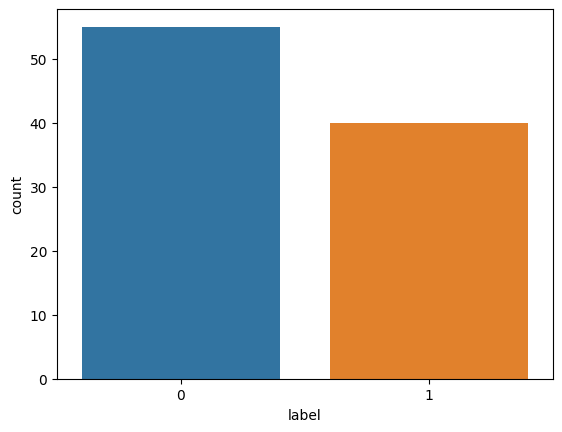

In [16]:
# ax = sns.countplot(data=total_data,x='label')       
ax = sns.countplot(x=y_class)        
Non_Anemic, Anemic = y_class.value_counts()
print('Number of Non-Anemic Patients : ',Non_Anemic)
print('Number of Anemic Patients : ',Anemic)

Number of Male Patients :  49
Number of Female Patients :  46


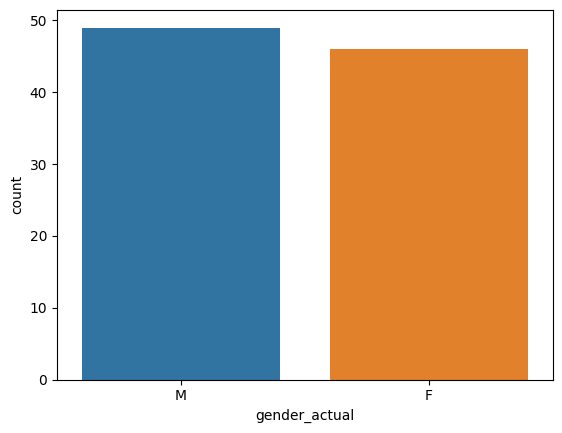

In [18]:
ax = sns.countplot(x=gender)        
boy, girl = gender.value_counts()
print('Number of Male Patients : ',boy)
print('Number of Female Patients : ',girl)

C:\Users\ACER\AppData\Local\Temp\ipykernel_1040\2218691611.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(total_data['age'])


<Axes: xlabel='age', ylabel='Density'>

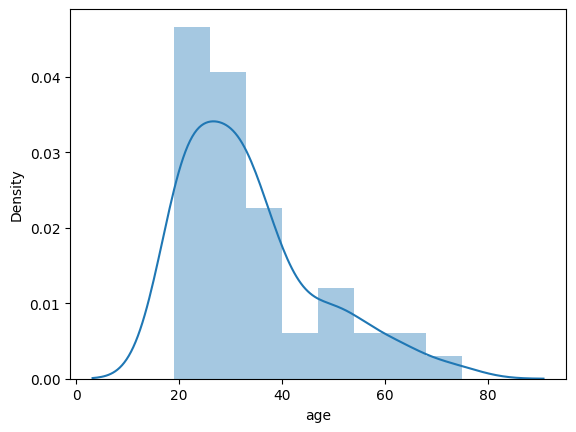

In [22]:
sns.distplot(total_data['age'])

In [26]:
x.describe()

,age,mean_r,mean_g,mean_b,mean_rg,HHR,Ent,B,G1,G2,G3,G4,G5
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,9.500000e+01,95.000000,95.000000
mean,33.673684,155.971351,114.698433,144.432805,55.742555,0.045221,1063.389913,130.437418,3.231218,3.292764,2.972340e-02,2.409607,39.606229
std,13.121723,12.536757,13.701094,13.804324,7.940498,0.025784,279.866724,12.646296,0.652999,0.619055,3.394863e-02,0.426886,12.031265
min,19.000000,93.155839,57.903152,82.817630,38.956684,0.003504,537.676404,68.833649,1.175424,1.272608,-6.000000e-17,0.917702,8.827232
25%,21.500000,149.133099,107.949028,138.438840,50.834822,0.025336,854.752063,123.528056,2.793032,2.917816,8.985000e-18,2.150822,30.868392
50%,31.000000,156.106742,112.577256,143.527488,54.647985,0.045600,1039.585788,130.217707,3.179136,3.296288,2.934400e-02,2.381599,39.024560
75%,39.000000,163.219093,122.761919,152.719500,60.541381,0.058344,1222.947097,137.948654,3.653048,3.691128,4.802933e-02,2.678076,46.386464
max,75.000000,195.729847,163.511324,191.705888,77.786821,0.176032,1904.046151,176.403375,4.950896,4.839392,1.715573e-01,3.430300,69.076512


C:\Users\ACER\AppData\Local\Temp\ipykernel_1040\1686501152.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(total_data['hgb'])


<Axes: xlabel='hgb', ylabel='Density'>

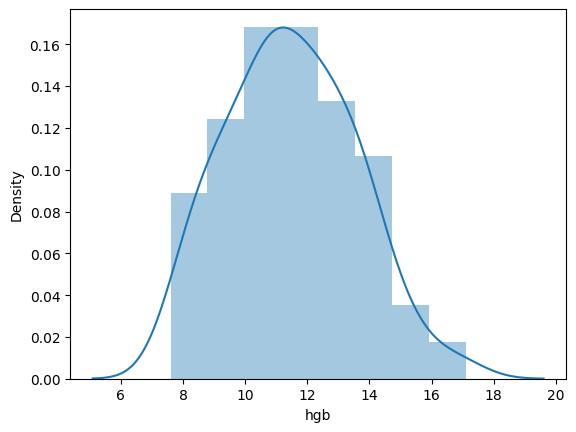

In [27]:
sns.distplot(total_data['hgb'])

In [28]:
total_data['hgb'].describe()

count    95.000000
mean     11.471579
std       2.075678
min       7.600000
25%       9.950000
50%      11.300000
75%      12.800000
max      17.100000
Name: hgb, dtype: float64

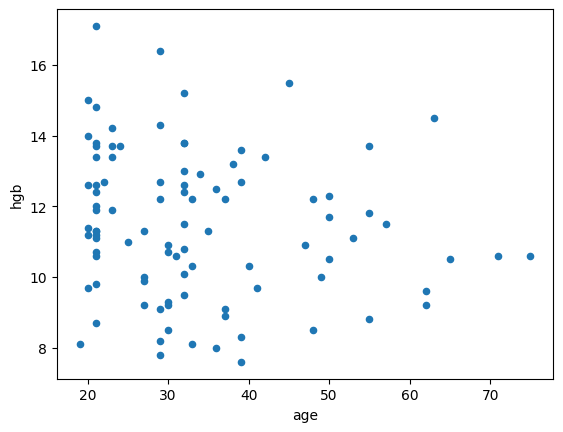

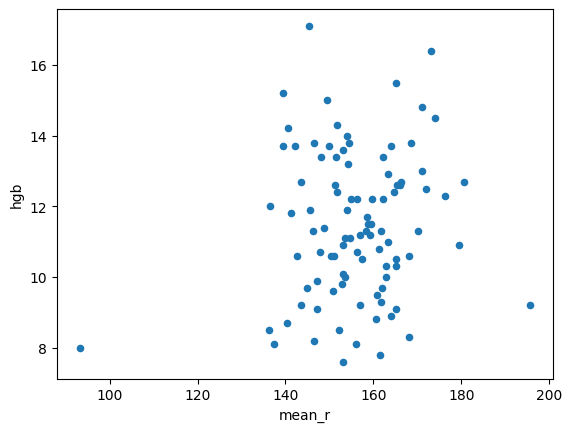

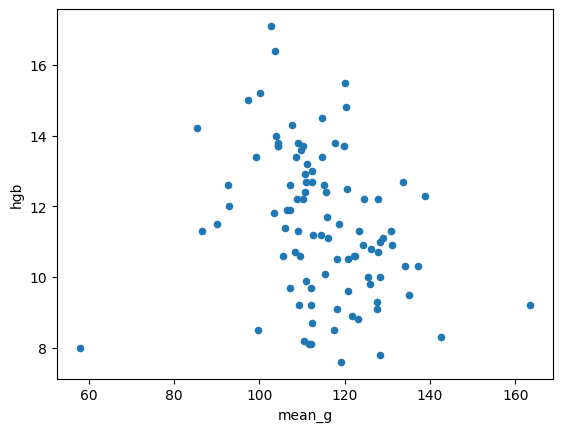

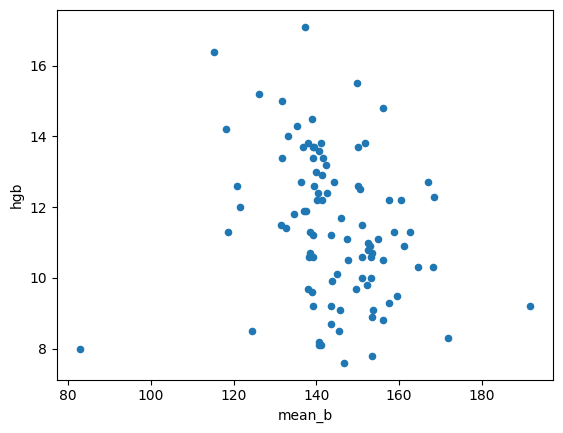

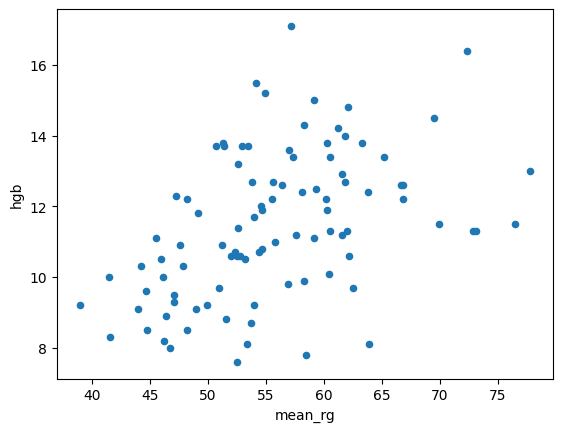

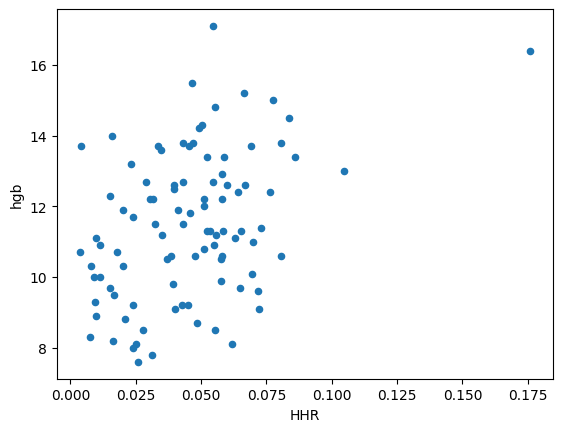

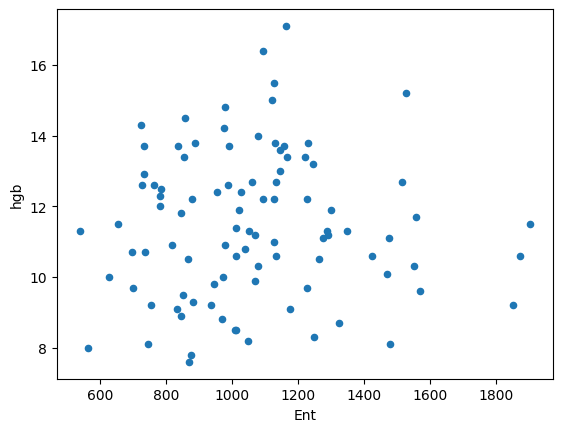

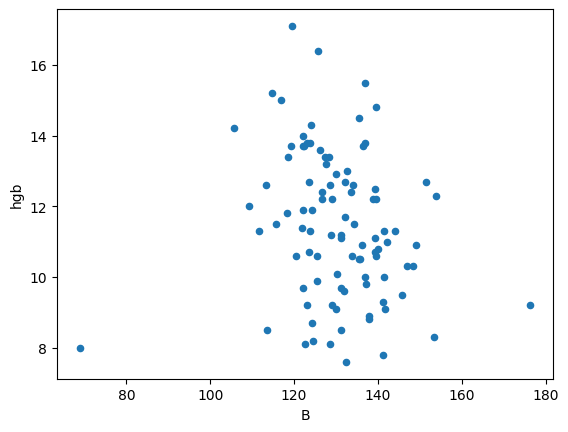

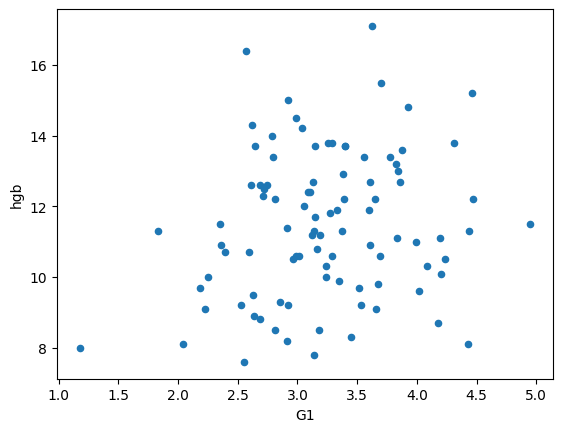

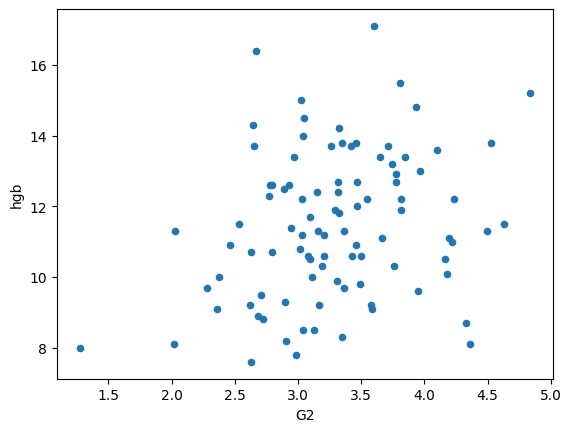

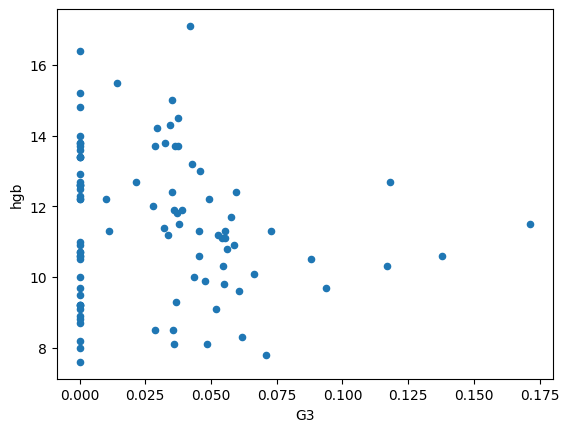

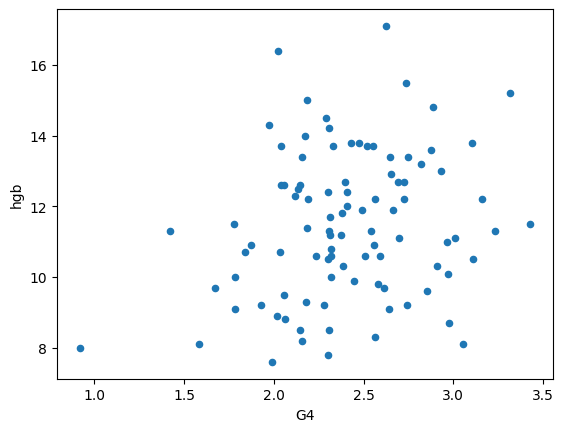

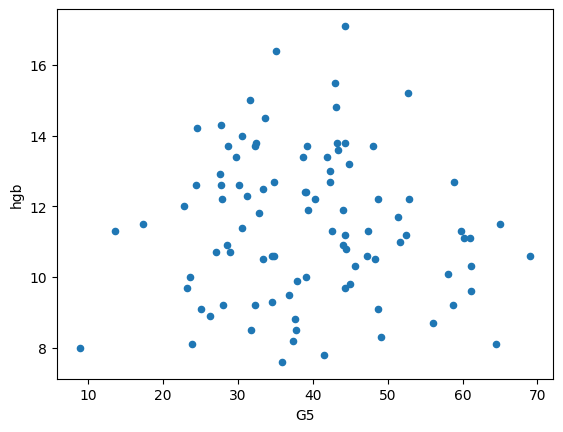

In [33]:
for i in x.columns:
    var = i
    data = pd.concat([total_data['hgb'], total_data[var]], axis=1)
    data.plot.scatter(x=var, y='hgb')

In [7]:
x['label']=y_class
x.insert(1,'gender',total_data.gender)

In [8]:
x.head()

,age,gender,mean_r,mean_g,mean_b,mean_rg,HHR,Ent,B,G1,G2,G3,G4,G5,label
0,29,0,162.253551,110.344051,140.106420,66.783275,0.051072,1125.472761,129.062154,3.390000,3.542816,-6.590000e-18,2.562056,40.268672,0
1,36,1,93.155839,57.903152,82.817630,46.735631,0.024032,564.048278,68.833649,1.175424,1.272608,1.460000e-17,0.917702,8.827232,1
2,30,1,156.337977,127.740262,153.386077,54.392947,0.017872,695.100841,139.239840,2.593296,2.793504,-8.640000e-18,2.032372,28.944064,1
3,39,1,168.003551,142.526411,171.719288,41.573798,0.007344,1248.653137,153.478341,3.447792,3.346256,6.161600e-02,2.564352,49.143024,1
4,29,1,161.395007,128.240333,153.480755,58.491050,0.031040,873.921511,141.151901,3.134768,2.984544,7.098667e-02,2.302943,41.525760,1


In [10]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      95 non-null     int64  
 1   gender   95 non-null     int64  
 2   mean_r   95 non-null     float64
 3   mean_g   95 non-null     float64
 4   mean_b   95 non-null     float64
 5   mean_rg  95 non-null     float64
 6   HHR      95 non-null     float64
 7   Ent      95 non-null     float64
 8   B        95 non-null     float64
 9   G1       95 non-null     float64
 10  G2       95 non-null     float64
 11  G3       95 non-null     float64
 12  G4       95 non-null     float64
 13  G5       95 non-null     float64
 14  label    95 non-null     int64  
dtypes: float64(12), int64(3)
memory usage: 11.3 KB


<Axes: >

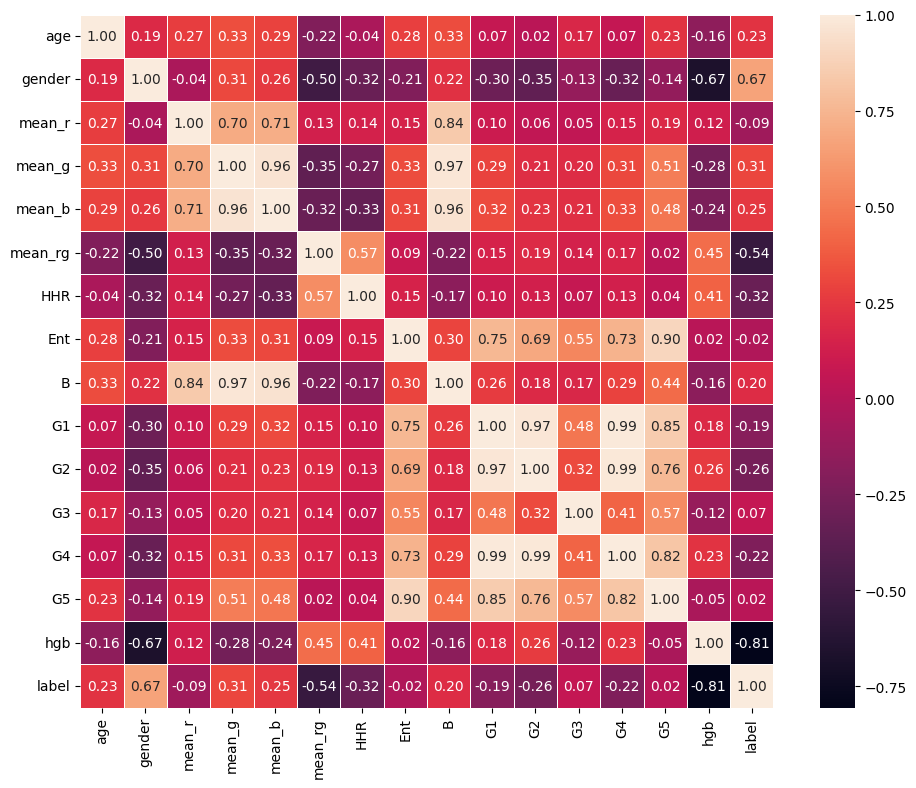

In [75]:
#correlation matrix
corrmat = x.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, linewidths=.5, fmt= '.2f', square=True)

In [13]:
x.drop(['mean_b','mean_rg','B','G2','G4','G5'],axis=1)

,age,gender,mean_r,mean_g,HHR,Ent,G1,G3,label
0,29,0,162.253551,110.344051,0.051072,1125.472761,3.390000,-6.590000e-18,0
1,36,1,93.155839,57.903152,0.024032,564.048278,1.175424,1.460000e-17,1
2,30,1,156.337977,127.740262,0.017872,695.100841,2.593296,-8.640000e-18,1
3,39,1,168.003551,142.526411,0.007344,1248.653137,3.447792,6.161600e-02,1
4,29,1,161.395007,128.240333,0.031040,873.921511,3.134768,7.098667e-02,1
...,...,...,...,...,...,...,...,...,...
90,21,0,162.090375,108.563746,0.058944,853.474447,2.795376,9.780000e-18,0
91,55,1,164.009288,119.898521,0.069120,835.161319,2.646160,3.642133e-02,0
92,29,0,143.446384,110.981539,0.028896,1133.242463,3.605232,2.154667e-02,0
93,53,1,153.583212,129.083154,0.009888,1274.606853,3.834096,5.407467e-02,0


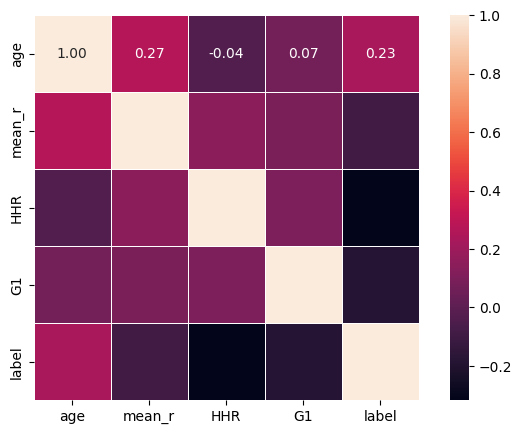

In [21]:
#correlation matrix
corrmat = x.drop(['mean_g','mean_b','mean_rg','B','Ent','hgb','gender','G2','G3','G4','G5'],axis=1).corr()
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(corrmat, annot=True, linewidths=.5, fmt= '.2f', square=True);

In [79]:
# x.head()

In [16]:
# x.drop(['gender','label'],axis=1,inplace=True)
x['hgb']=y_reg
# x.head()

In [59]:
x.var()

age          172.179619
mean_r       157.170271
mean_g       187.719966
mean_b       190.559353
mean_rg       63.051509
HHR            0.000665
Ent        78325.383046
B            159.928805
G1             0.426408
G2             0.383229
G3             0.001153
G4             0.182232
G5           144.751337
hgb            4.308439
dtype: float64

In [60]:
x.skew()

age        1.145154
mean_r    -0.928180
mean_g    -0.308142
mean_b    -0.562328
mean_rg    0.475687
HHR        1.346851
Ent        0.773409
B         -0.688775
G1        -0.023849
G2        -0.037762
G3         1.489755
G4        -0.242377
G5         0.221353
hgb        0.237671
dtype: float64

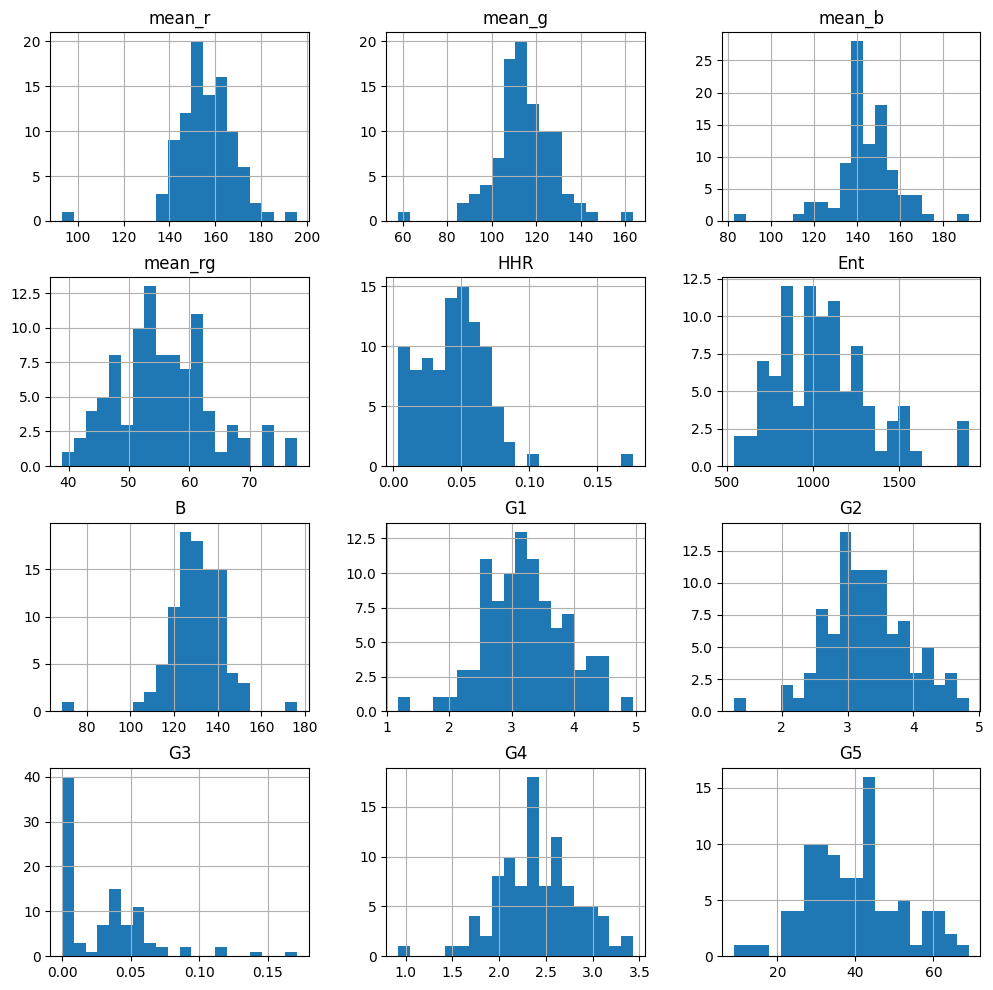

In [73]:
x.drop(['age','hgb','label','gender'],axis = 1).hist(figsize=(12,12),bins=20)
plt.show()

In [67]:
# for i in x.columns[:-1]:
#     sns.distplot(x[i])
#     plt.show()

C:\Users\ACER\anaconda3\envs\virenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


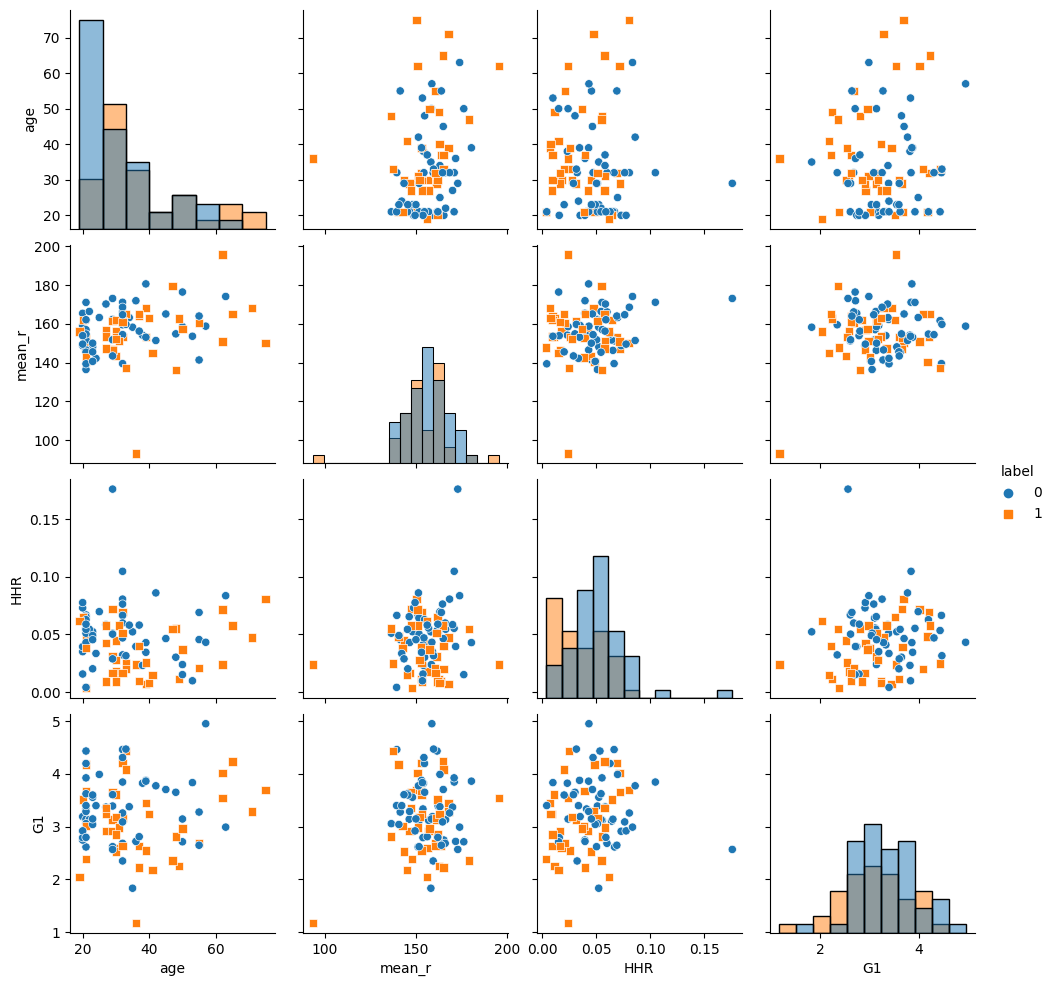

In [85]:
sns.pairplot(x.drop(['mean_g','mean_b','mean_rg','B','Ent','G4','hgb','G5','gender','G3','G2'],axis=1), hue='label',markers=["o", "s"],diag_kind="hist")
plt.show()

In [99]:
# cols = ['mean_g','mean_b','mean_rg','B','Ent','G4','G5','G3','G2','label']
# sns.pairplot(x[cols], hue='label',markers=["o", "s"],diag_kind="hist",height=3)
# plt.show()